In [173]:
from __future__ import print_function
import os
import numpy as np
import sklearn.metrics as metrics
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import img_to_array, load_img
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
import warnings
warnings.filterwarnings("ignore")

In [174]:
batch_size = 128
num_classes = 10
epochs = 1

In [175]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

0 Data shape: (28, 28) ; Label: 5
1 Data shape: (28, 28) ; Label: 0
2 Data shape: (28, 28) ; Label: 4
3 Data shape: (28, 28) ; Label: 1
4 Data shape: (28, 28) ; Label: 9
5 Data shape: (28, 28) ; Label: 2
6 Data shape: (28, 28) ; Label: 1
7 Data shape: (28, 28) ; Label: 3
8 Data shape: (28, 28) ; Label: 1


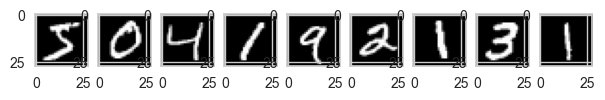

In [176]:
for i in range(0,9):
    print(i,'Data shape:',x_train[i].shape,'; Label:', y_train[i])
    plt.subplot(1,10,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [177]:
list3=[]
for i in range(0,500):
    if y_train[i]==3:
        list3.append(i)
a=len(list3)
if np.mod(a,10)==0:
    k=a//10
else:
    k=a//10+1
k

5

In [178]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [179]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [180]:
#MODEL 1
model = Sequential()
#1st Convolutional layer
model.add(Conv2D(24, kernel_size=(5, 5),strides=1,
                 activation='relu',
                 input_shape=input_shape))
#1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='PoolLayer'))
#1st Dropout layer to avoid overfitting
model.add(Dropout(0.25))
#Flatten n-dimensions to be 1-dimension
model.add(Flatten())
#Learning layer
model.add(Dense(128, activation='relu',name='HiddenLayer'))
#2nd Dropout layer to avoid overfitting
model.add(Dropout(0.5))
#Output layer
model.add(Dense(num_classes, activation='softmax',name='OutputLayer'))
model.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8132 - loss: 0.5900 - val_accuracy: 0.9751 - val_loss: 0.0798


In [181]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Model 1 Test loss:', score[0])
print('Model 1 Test accuracy:', score[1])

Model 1 Test loss: 0.08045138418674469
Model 1 Test accuracy: 0.9750999808311462


In [182]:
#MODEL 2
model = Sequential()
#1st Convolutional layer
model.add(Conv2D(24, kernel_size=(5, 5),strides=1,
                 activation='relu',
                 input_shape=input_shape))
#1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='PoolLayer'))
#2nd Convolutional layer
model.add(Conv2D(48, (5, 5), activation='relu'))
#2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, name='PoolLayer2'))

#1st Dropout layer to avoid overfitting
model.add(Dropout(0.25))
#Flatten n-dimensions to be 1-dimension
model.add(Flatten())
#Learning layer
model.add(Dense(128, activation='relu',name='HiddenLayer'))
#2nd Dropout layer to avoid overfitting
model.add(Dropout(0.5))
#Output layer
model.add(Dense(num_classes, activation='softmax',name='OutputLayer'))
model.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7842 - loss: 0.6685 - val_accuracy: 0.9834 - val_loss: 0.0525


In [183]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Model 2 Test loss:', score[0])
print('Model 2 Test accuracy:', score[1])

Model 2 Test loss: 0.05297654867172241
Model 2 Test accuracy: 0.9833999872207642


In [184]:
#MODEL 3
model = Sequential()
#1st Convolutional layer
model.add(Conv2D(24, kernel_size=(5, 5),strides=1,
                 activation='relu',
                 input_shape=input_shape))
#1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='PoolLayer'))
#2nd Convolutional layer
model.add(Conv2D(48, (5, 5), activation='relu'))
#2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, name='PoolLayer2'))
# 3rd Convolutional layer
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
#3rd Pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, name='PoolLayer3'))

#1st Dropout layer to avoid overfitting
model.add(Dropout(0.25))
#Flatten n-dimensions to be 1-dimension
model.add(Flatten())
#Learning layer
model.add(Dense(128, activation='relu',name='HiddenLayer'))
#2nd Dropout layer to avoid overfitting
model.add(Dropout(0.5))
#Output layer
model.add(Dense(num_classes, activation='softmax',name='OutputLayer'))
model.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7712 - loss: 0.6888 - val_accuracy: 0.9844 - val_loss: 0.0483


In [185]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Model 3 Test loss:', score[0])
print('Model 3 Test accuracy:', score[1])

Model 3 Test loss: 0.048795100301504135
Model 3 Test accuracy: 0.9843999743461609


In [186]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [187]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[ 977,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [   0, 1129,    2,    2,    0,    0,    1,    1,    0,    0],
       [   4,    3, 1015,    1,    1,    0,    2,    4,    2,    0],
       [   0,    0,    1,  999,    0,    4,    0,    2,    4,    0],
       [   0,    0,    1,    0,  970,    0,    4,    0,    2,    5],
       [   1,    0,    0,    5,    1,  879,    2,    1,    2,    1],
       [   7,    2,    1,    1,    1,    1,  945,    0,    0,    0],
       [   1,    8,   13,    6,    0,    0,    0,  992,    3,    5],
       [   3,    1,    1,    0,    2,    0,    1,    1,  963,    2],
       [   1,    4,    0,    3,    6,    4,    1,    7,    8,  975]])

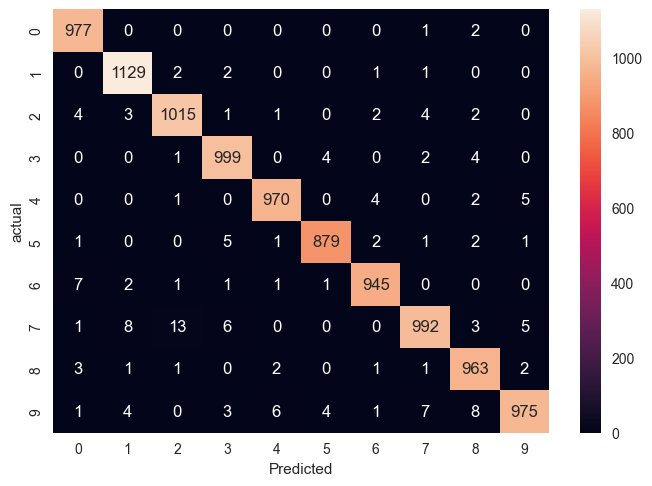

In [188]:
sns.heatmap(matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7672 - loss: 0.7009 - val_accuracy: 0.9785 - val_loss: 0.0643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
------------------
The predicted output for image 1 is: 1
------------------


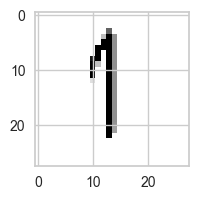

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 2 is: 2
------------------


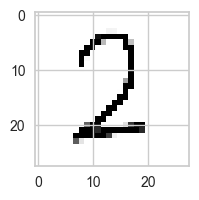

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 3 is: 3
------------------


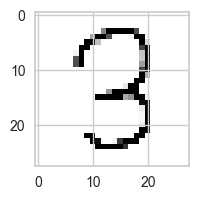

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 4 is: 4
------------------


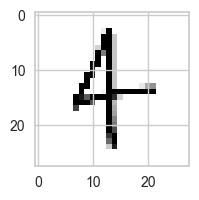

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
------------------
The predicted output for image 5 is: 5
------------------


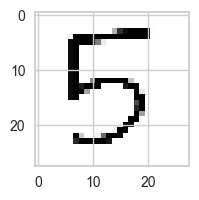

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 6 is: 6
------------------


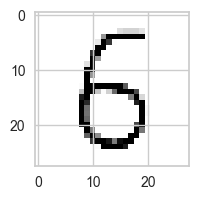

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 7 is: 7
------------------


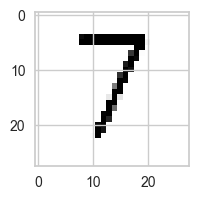

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 8 is: 8
------------------


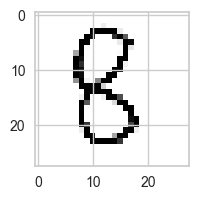

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
------------------
The predicted output for image 9 is: 9
------------------


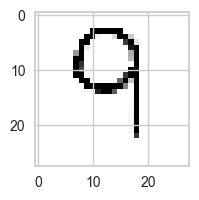

In [194]:
import cv2 as cv
#MODEL 3
model = Sequential()
#1st Convolutional layer
model.add(Conv2D(24, kernel_size=(5, 5),strides=1,
                 activation='relu',
                 input_shape=input_shape))
#1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='PoolLayer'))
#2nd Convolutional layer
model.add(Conv2D(48, (5, 5), activation='relu'))
#2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, name='PoolLayer2'))
# 3rd Convolutional layer
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
#3rd Pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, name='PoolLayer3'))

#1st Dropout layer to avoid overfitting
model.add(Dropout(0.25))
#Flatten n-dimensions to be 1-dimension
model.add(Flatten())
#Learning layer
model.add(Dense(128, activation='relu',name='HiddenLayer'))
#2nd Dropout layer to avoid overfitting
model.add(Dropout(0.5))
#Output layer
model.add(Dense(num_classes, activation='softmax',name='OutputLayer'))
model.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

for x in range(1, 10):
    try:
        img = cv.imread(f'HandWriting4/{x}.png', cv.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Error reading image: HandWriting4/{x}.png")
        img = cv.resize(img, (28, 28))
        img = np.invert(img)
        img = np.array([img])
        prediction = model.predict(img)
        print("------------------")
        print("The predicted output for image", x, "is:", np.argmax(prediction))
        print("------------------")
        plt.figure(figsize=(2, 2))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f"Error processing image: HandWriting4/{x}.png")
        print(e)


In [190]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Overall Accuracy:", accuracy)
print("Overall Loss:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0624
Overall Accuracy: 0.9837999939918518
Overall Loss: 0.051157575100660324


In [191]:
images=np.array(images)
class_names=np.array(class_names)
class_names = to_categorical(class_names, num_classes)

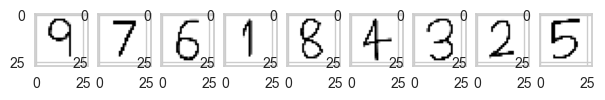

In [192]:
n=images.shape[0]
if np.mod(n,10)==0:
    k=n//10
else:
    k=n//10+1
for i in range (0,n):
    plt.subplot(k,10,1 + i)
    plt.imshow(images[i].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.show()